### Ознакомление с данными

Перед началом анализа необходимо считать, ознакомиться и обработать полученные данные:

In [1]:
# Установим библиотеку для визуализации пропусков:
!pip install missingno -q

# Импорт необходимых библиотек и модулей:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import missingno as msno

Прочитаем данные и сохраним отдельно:

In [2]:
data = pd.read_csv('/datasets/games.csv')

# Проверка:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Перед началом работы посмотрим общую информацию о датафрейме:

In [3]:
# Вывод общей информации:
data.info()

print('\nКол-во строк:', data.shape[0])
print('Кол-во столбцов:', data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Кол-во строк: 16715
Кол-во столбцов: 11


Проверим наличие явных дубликатов в выгрузке:

In [4]:
print('Кол-во явных дубликатов:',
     data.duplicated().sum())

Кол-во явных дубликатов: 0


Явных дубликатов обнаружено не было. Теперь исправим некорректный стиль написания названий столбцов:

In [5]:
# Приводим все названия столбцов к нижнему регистру:
data.columns = data.columns.str.lower()

# Проверка:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


Также ряд столбцов имеют пропуски, рассчитаем долю пропусков для каждого столбца:

In [6]:
# Расчёт доли пропусков:
perc_nan = data.isna().sum() / len(data) * 100

# Выведем по убыванию:
perc_nan.sort_values(ascending=False).round(2)

critic_score       51.32
rating             40.48
user_score         40.09
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64

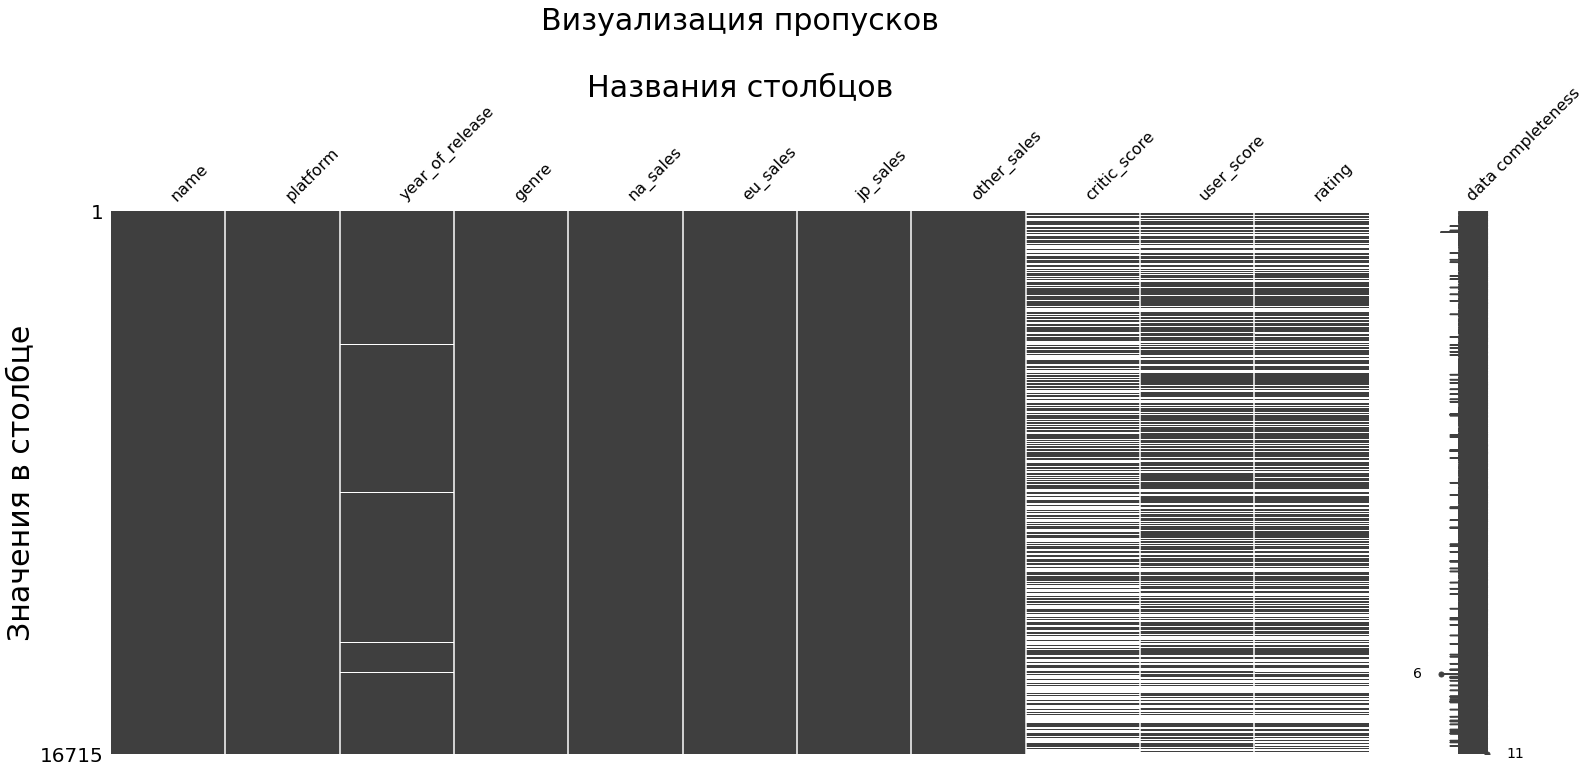

In [7]:
# Визуализируем пропуски:
msno.matrix(data, labels=True)

# Настройка визуализации:
plt.title(
    'Визуализация пропусков\n\nНазвания столбцов',
    fontsize=30)
plt.ylabel('Значения в столбце', fontsize=30)

plt.show()

Как видно из визуализации выше, распределение пропущенных значений в нашем датафрейме выглядит случайным, то есть нет никакой закономерности и это может означать, что пропуски могли быть образованы техническим сбоем при выгрузке данных, например.

In [8]:
# Выведем кол-во пропусков в каждом столбце:
data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Есть три проблемных в этом смысле столбца: **critic_score** (оценка критиков), **rating** (рейтинг от организации) и **user_score** (оценка пользователей). Доля пропусков в них слишком высока, чтобы их удалять, это приведёт к колоссальной потере данных.

Также из полученной выше общей информации выявлено несоответствие типа данных у следующих столбцов:

1. `year_of_release` должен быть int, т.к. год это целое число (сейчас вещ.-й тип float);
2. `critic_score` должен быть int, т.к. оценка была выставлена в стобальной системе и баллы не делятся (сейчас вещ.-й тип float).
3. `user_score` должен быть float, т.к. оценка была выставлена в десятибальной системе с дробящимися баллами (сейчас строковый object из-за значения tbd)

Посмотрим временной охват данных:

In [9]:
# Выведем мин. и макс. значение:
print('Нижняя граница года:',
      data['year_of_release'].min())
print('Верхняя граница года:',
      data['year_of_release'].max())

Нижняя граница года: 1980.0
Верхняя граница года: 2016.0


### Вывод

На данном этапе:

   - датафрейм был прочитан и сохранён;
   - столбцы приведены к корректным названиям;
   - выявлено наличие пропусков у ряда столбцов;
   - выявлено несоответствие типа данных у ряда столцов;
   - узнали, что данные охватывают период в 36 лет;

## Предобработка данных

Изменим типы данных у столбцов на корректные:

In [10]:
# Год выпуска:
# В этом случае, думаю, обойдёмся обычным целым числом
data['year_of_release'] = data['year_of_release'].astype('Int64')

# Проверка:
data['year_of_release'].head(3)

0    2006
1    1985
2    2008
Name: year_of_release, dtype: Int64

In [11]:
# Оценка критиков:
data['critic_score'] = data['critic_score'].astype('Int32')

# Проверка:
data['critic_score'].head(3)

0      76
1    <NA>
2      82
Name: critic_score, dtype: Int32

Столбец **user_score** содержит строковый (или смешанный) тип данных. Посмотрим на его уникальные значения:

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Неизвестное `'tbd'` (скорее всего _to be determined_  «будет определено», что эквивалентно отсутствию оценки). Посмотрим, сколько всего строк с таким значением оценки от пользователей:

In [13]:
print("Кол-во строк со значением 'tbd':",
      data[data['user_score'] == 'tbd']['user_score'].count())

Кол-во строк со значением 'tbd': 2424


Слишком много. Не получится заполнить ничем логичным, поэтому придётся принудильно изменить на NaN.

In [14]:
# Выборочная замена значений:
data['user_score'] = data['user_score'].where(
    data['user_score'] != 'tbd', '')

# Проверка:
print("Кол-во строк со значением 'tbd':",
      data[data['user_score'] == 'tbd']['user_score'].count())

Кол-во строк со значением 'tbd': 0


In [15]:
# Изменим строковый тип на числовой:
data['user_score'] = pd.to_numeric(
    data['user_score'], errors='coerce')

# Проверка:
print('Тип user_score:', data['user_score'].dtypes)

Тип user_score: float64


Посмотрим доли пропусков еще раз после изменения типов данных и принудительного изменения пустых значений:

In [16]:
# Выведем еще раз кол-во пропусков в каждом столбце:
print('\nКоличество пропусков:')
print('\n', data.isna().sum().sort_values(ascending=False))

# Расчёт доли пропусков:
perc_nan = data.isna().sum() / len(data) * 100

# Выведем по убыванию:
print('\nПроцентная доля пропусков:')
perc_nan.sort_values(ascending=False).round(2)


Количество пропусков:

 user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Процентная доля пропусков:


user_score         54.59
critic_score       51.32
rating             40.48
year_of_release     1.61
name                0.01
genre               0.01
platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
dtype: float64

И, наконец, посмотрим итоговую картину по типам данных столбцов:

In [17]:
print('\nТипы данных после изменений:')
data.dtypes


Типы данных после изменений:


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int32
user_score         float64
rating              object
dtype: object

### Обработка пропусков

Больше всего пропусков в столбцах, связанных с оценками (**user_score**, **critic_score**) и рейтингом (**rating**). Они могли возникнуть по технической причине (либо ошибка при выгрузке, либо этой информации могло изначально не быть в самом источнике). Удалять их точно нельзя, будет потеряна значительная часть данных.

Выведем количество игр, в которых вообще отсутствуют какие-либо оценки и рейтинги.

In [18]:
print('Кол-во игр с пустыми рейтингами:',
    data[data['user_score'].isna() & \
    data['critic_score'].isna() & \
    data['rating'].isna()]['name'].count())

Кол-во игр с пустыми рейтингами: 6665


Вручную восстановить точно не сможем — их слишком много. Можно было бы заполнить характерным значениям по жанрам, но оценка это вещь субъективная для каждого критика и пользователя, по мнениям которых и складывали общие баллы оценки. Если заполнить характерным значением по жанру или пр., то снизится точность исследования.

Ничем логичным заменить не удаётся, придётся оставить пропуски в `user_score`, `critic_score` и `rating`. Удалю строки, где пропущено слишком много данных: не только все оценки и рейтинги, но и год выпуска. Они будут мало полезны в дальнейшем анализе.

In [19]:
print('Кол-во строк до фильтрации:',
     data.shape[0])

data = data.drop(data[
    data['year_of_release'].isna() & \
    data['critic_score'].isna() & \
    data['user_score'].isna() & data['rating'].isna()
].index)

# Восстановим порядок индексации:
data.reset_index(drop=True, inplace=True)

# Проверка:
print('Кол-во строк после фильтрации:',
     data.shape[0])

Кол-во строк до фильтрации: 16715
Кол-во строк после фильтрации: 16630


Так как столбец **rating** имеет строковый тип данных, мы можем если и не заполнить чем-то логичным, то хотя бы заполнить неизвестные данные значением `'unknown'`.

In [20]:
# Заполняем пропуски:
data['rating'].fillna(value='unknown', inplace=True)

# Проверка:
print('Кол-во пропусков в столбце rating:',
      data['rating'].isna().sum())

Кол-во пропусков в столбце rating: 0


Имеются также 2 строки с упущенным названием (столбец `name`). Взглянем на них:

In [21]:
# Выведем срез по нужным строкам:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,unknown
14183,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,unknown


Критично мало информации. Уберём эти строки и посмотрим на кол-во пропусков после обработки:

In [22]:
# Удаление строк:
data = data.dropna(subset=['name'])

# Проверка:
print('\nКоличество пропусков:')
data.isna().sum().sort_values(ascending=False)


Количество пропусков:


user_score         9038
critic_score       8491
year_of_release     184
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64

К сожалению, пропуски в столбце **year_of_release** тоже не получится заменить ничем подходящим. Оставим как есть.

После обработки пропусков проверим датафрейм на наличие неявных дубликатов. Они могут быть в столбцах `platform` и `genre`.

In [23]:
# Выведем список уникальных значений платформ:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов в нём не обнаружено. Проверим жанры:

In [24]:
# Выведем список уникальных значений жанров:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов в нём также не обнаружено.

Создадим дополнительный столбец, в котором посчитаем суммарные продажи во всех регионах:

In [25]:
# Создание доп. столбца:
data['total_sales'] = \
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Проверка:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52


### Выявление аномалий

Перед началом анализа необходимо выявить и при необходимости обработать аномальные значения. Посмотрим на числовые характеристики датафрейма.

In [26]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16628.000000,16628.000000,16628.000000,16628.000000,8137.000000,7590.000000,16628.000000
mean,2006.486256,0.263756,0.145580,0.077710,0.047520,68.967679,7.125046,0.534565
std,5.875525,0.815175,0.504498,0.309517,0.187169,13.938165,1.500006,1.551733
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Видим, что:

1. Есть позиции в нулевыми общими продажами.
2. Есть позиции, получившие оценку в 0 баллов от пользователей.

Рассмотрим подробнее и взглянем на диаграммы размаха. Начнём с оценки пользователей:

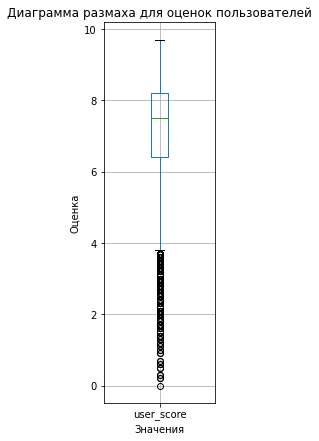

In [27]:
# Построение ДР для оценок пользователей
data.boxplot(
    column='user_score',
    figsize=(2, 7)
)
plt.title('Диаграмма размаха для оценок пользователей')
plt.xlabel('Значения')
plt.ylabel('Оценка')

plt.show()

Видно, что оценки ниже ~3.8 сичтаются выбросами, однако удалять их точно не стоит, т.к. будут потеряны другие ценные данные. Стоит взглянуть на строчки с нулевыми оценками. Она, похоже, всего одна и можно оценить её будущий вклад в анализ.

In [28]:
# Получим срез с этой строкой:
data[data['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2825,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,<NA>,0.0,E,0.72


Помимо нулевой оценки от пользователей, также отсутствует и оценка критиков. Это могло произойти при выгрузке данных. Считаю, что можно её убрать.

In [29]:
# Уберем строку:
data = data.query('user_score != 0')

# Проверка:
print('Кол-во строк с нулевой оценкой пользователей:',
     data[data['user_score'] == 0]['name'].count())

Кол-во строк с нулевой оценкой пользователей: 0


Теперь рассмотрим **общие продажи**:

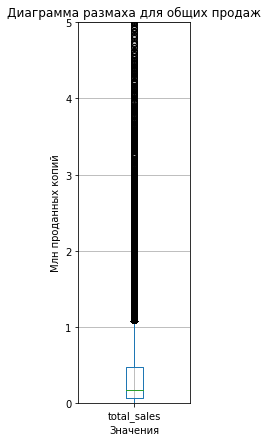

In [30]:
# Построение ДР для общих продаж:
data.boxplot(
    column='total_sales',
    figsize=(2, 7)
)
plt.title('Диаграмма размаха для общих продаж')
plt.xlabel('Значения')
plt.ylabel('Млн проданных копий')
plt.ylim(0, 5)

plt.show()

Из диаграммы видно, что значения выше 1,1млн копий уже считаются выбросами, однако здесь ситуация аналогичная. Их настолько много, что удалять категорически не стоит. Посмотрим, сколько игр с нулевыми общими продажами.

In [31]:
# Получим срез с помощью логического условия:
data[data['total_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16591,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,<NA>,NaN,unknown,0.0
16624,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,<NA>,NaN,unknown,0.0


Продажи, оценки и рейтинг пустые. Такие строчки вряд ли будут полезны для дальнейшей работы, стоит их убрать из датафрейма:

In [32]:
# Уберем строки
data = data.query('total_sales != 0')

# Проверка:
print('Кол-во строк с нулевыми общими продажами:',
     data[data['total_sales'] == 0]['name'].count())

Кол-во строк с нулевыми общими продажами: 0


Таким образом, после обработки ситуация по пропускам и кол-ву строк такова:

In [33]:
# Повторный расчёт доли пропусков:
perc_nan = data.isna().sum() / len(data) * 100

# Выведем по убыванию:
print('\nПроцентная доля пропусков:')
print(perc_nan.sort_values(ascending=False).round(2))

print('\nКол-во строк:', data.shape[0])


Процентная доля пропусков:
user_score         54.35
critic_score       51.06
year_of_release     1.11
name                0.00
platform            0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
rating              0.00
total_sales         0.00
dtype: float64

Кол-во строк: 16625


### Вывод

На данном этапе была проведена предобработка данных:

1. обработаны пропуски;
2. выявлены и обработаны аномальные значения;
3. выявлено отсутствие неявных дубликатов в датафрейме;
4. создан дополнительный столбец с общими продажами;

## Исследовательский анализ данных


### Продажи по годам и платформам

Рассмотрим, сколько игр выпускалось в разные годы. Нам точно не понадобятся слишком устаревшие данные, т.к. игровая индустрия сильно изменилась за последнее время и продолжает меняться.

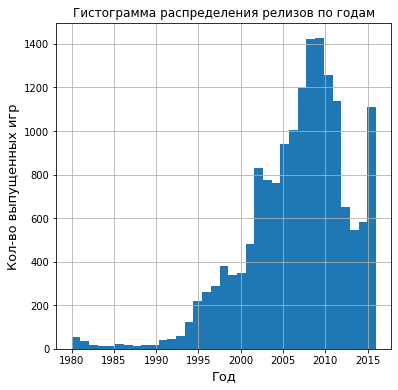

In [34]:
# Построение гистограмму для игр по годам:
data['year_of_release'].plot(
    kind='hist',
    figsize=(6, 6),
    bins=35,
    grid=True
)
plt.title('Гистограмма распределения релизов по годам')
plt.xlabel('Год', fontsize=13)
plt.ylabel('Кол-во выпущенных игр', fontsize=13)

plt.show()

Как видно из гистограммы, «обострение» игровой индустрии начало происходить `после 2001г`. Пик выпуска игр пришёлся на период с 2007 по 2011г. После 2010г. был подозрительный спад и в 2015-2016г. снова игровой «бум».

Как и ожидалось, в период до `1995` года игр выходило меньше всего. Были другие технологии, другое время, в котором видеоигры только набирали свою популярность.

Посмотрим нагляднее на годы по количеству релизов:

In [35]:
# Выведем топ-10 годов по кол-ву релизов игр:
data['year_of_release'].value_counts().head(10)

2009    1426
2008    1424
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: Int64

Далее посмотрим, как менялись продажи по платформам.

In [36]:
# Создадим сводную таблицу по платформам:
platform_stat = data.pivot_table(
    index='platform',
    
    values=['name', 
            'total_sales',
            'year_of_release'],
    
    aggfunc=({'name': 'count',
              'total_sales': 'sum',
              'year_of_release': ['min', 'max']})
)
# Переименуем названия столбцов:
platform_stat.columns = ['releases', 'total_sales',
                         'max_year', 'min_year']

# Добавим в неё сортировку по продажам:
platform_stat = platform_stat.sort_values(
    by='total_sales',
    ascending=False
)

# Добавим столбец с временным периодом платформы:
platform_stat['time_period'] = \
    platform_stat['max_year'] - platform_stat['min_year']

# Проверка, вывод топ-10 платформ:
platform_stat.head(10)

,releases,total_sales,max_year,min_year,time_period
platform,,,,,
PS2,2151,1251.44,2011,2000,11
X360,1256,971.15,2016,2005,11
PS3,1323,939.21,2016,2006,10
Wii,1311,905.90,2016,2006,10
DS,2138,804.86,2013,1985,28
PS,1194,729.27,2003,1994,9
GBA,819,316.46,2007,2000,7
PS4,392,314.14,2016,2013,3
PSP,1201,292.53,2015,2004,11


Таким образом, в тройке лидеров по продажам находятся **PS2**, **Xbox360** и **PS3**. Построим распределение продаж по годам для каждой из них: 

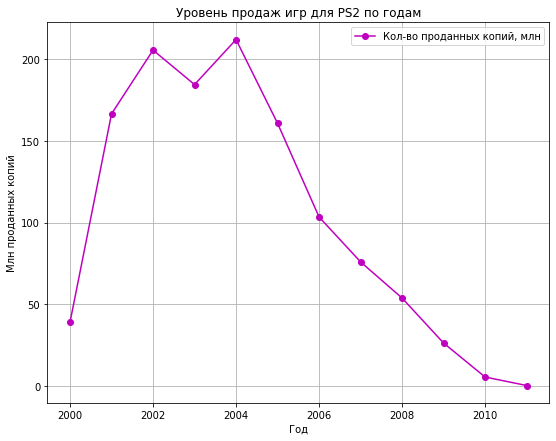

In [37]:
# Распределение продаж для PS2
# Отфильтруем осн. датафрейм для построения графика:
ps2_stat = data.query('platform == "PS2"')

# Преобразуем в сводную таблицу:
ps2_stat = ps2_stat.pivot_table(
    index='year_of_release',
    values='total_sales',
    aggfunc='sum'
)

# Построение графика:
ps2_stat.plot(style='o-',
                grid=True,
               figsize=(9, 7),
               xlabel='Год',
               ylabel='Млн проданных копий',
              color='m'
)
plt.title('Уровень продаж игр для PS2 по годам')
plt.legend(['Кол-во проданных копий, млн'])

plt.show()

Как видно на графике выше, для **PlayStation 2** было два пиковых по продажам года: `2002` и `2004`. Чуть более 200млн проданных копий в каждый. Далее после 2004 шёл уверенный спад.

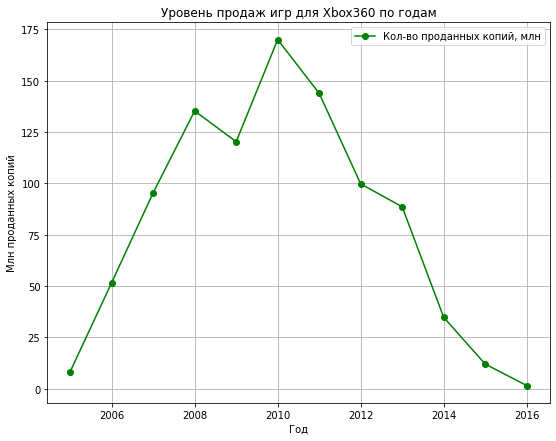

In [38]:
# Распределение продаж для Xbox360
# Отфильтруем осн. датафрейм для построения графика:
xbox360_stat = data.query('platform == "X360"')

# Преобразуем в сводную таблицу:
xbox360_stat = xbox360_stat.pivot_table(
    index='year_of_release',
    values='total_sales',
    aggfunc='sum'
)

# Построение графика:
xbox360_stat.plot(style='o-',
                grid=True,
               figsize=(9, 7),
               xlabel='Год',
               ylabel='Млн проданных копий',
              color='green'
)
plt.title('Уровень продаж игр для Xbox360 по годам')
plt.legend(['Кол-во проданных копий, млн'])

plt.show()

Как видно на следующем графике, для **Xbox360** самыми лучшими попродажам годами стали: `2010г` (~ 170млн копий), `2011г` (~ 140млн копий), `2008г` (~ 135млн копий). После пикового 2010 года продажи только стремительно падали.

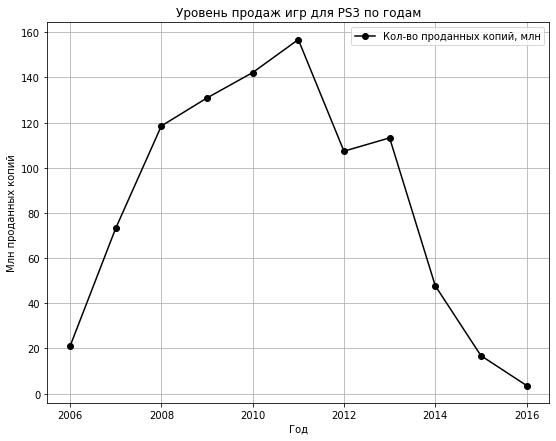

In [39]:
# Распределение продаж для PS3
# Отфильтруем осн. датафрейм для построения графика:
ps3_stat = data.query('platform == "PS3"')

# Преобразуем в сводную таблицу:
ps3_stat = ps3_stat.pivot_table(
    index='year_of_release',
    values='total_sales',
    aggfunc='sum'
)

# Построение графика:
ps3_stat.plot(style='o-',
                grid=True,
               figsize=(9, 7),
               xlabel='Год',
               ylabel='Млн проданных копий',
              color='black'
)
plt.title('Уровень продаж игр для PS3 по годам')
plt.legend(['Кол-во проданных копий, млн'])

plt.show()

Исходя из данного графика, самый пиковый год для **PlayStation 3** был `2011` — около 155млн копий. После него был только спад, не считая 2013, где продажи чуть поднялись с ~ 110млн до ~ 115млн копий.

С помощью созданной выше сводной таблицы по всем платформам `platform_stat` можно рассчитать характерное время появления новых платформ:

In [40]:
# Расчёт характерного времени появления:
print(f'Новые платформы появляются в среднем каждые \
{platform_stat.time_period.mean().round(1)} лет.')

Новые платформы появляются в среднем каждые 7.6 лет.


### Определяем актуальный период

Возьмём данные за актуальный период для построения прогноза на 2017г. Я думаю, в этом помогут данные начиная с `2012` года. Учитывать устаревшие данные не будем, поэтому сохраним актуальные отдельно:

In [41]:
# Отфильтруем осн. датафрейм
recent_data = data.query('year_of_release >= 2012')

# Проверка:
display(recent_data.head(3))

print('\nКол-во строк:', recent_data.shape[0])
print('\nМинимальный год:', 
      recent_data['year_of_release'].min())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,unknown,14.63



Кол-во строк: 2886

Минимальный год: 2012


Определим, какие платформы лидируют по продажам, растут или падают. Это поможет нам выберать несколько потенциально прибыльных платформ. Построим график, где объединим имеющиеся платформы и посмотрим на продажи:

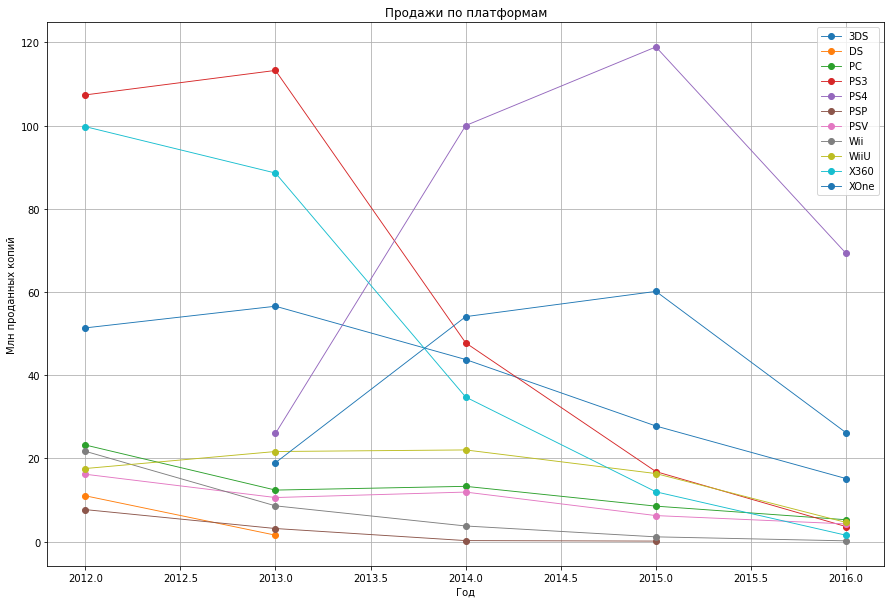

In [42]:
# Сгруппируем в сводной таблице по годам каждую платформу:
recent_sales_stat = recent_data.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Построение графика:
recent_sales_stat.plot(
    style='o-',
    grid=True,
    figsize=(15, 10),
    xlabel='Год',
    ylabel='Млн проданных копий',
    linewidth=0.9
)
plt.title('Продажи по платформам')
plt.legend()

plt.show()

Судя по общему графику, просели по продажам абсолютно все платформы. Тем не менее, за последнее время можно выделить следующих лидеров:

1. `PS4`
2. `XOne`
3. `Nintendo 3DS`

В лидерах также были `PS3` и `Xbox360`, но в 2013 году вышли их улучшенные версии `PS4` и `Xbox One`, поэтому они ожидаемо стали снижаться по уровню продаж. Поэтому, названные выше 3 платформы будем считать потенциально прибыльными.

### Диаграммы размаха

Построим диаграммы размаха для продаж по каждой платфоме. Посмотрим, как распределены продажи у каждой платформы.

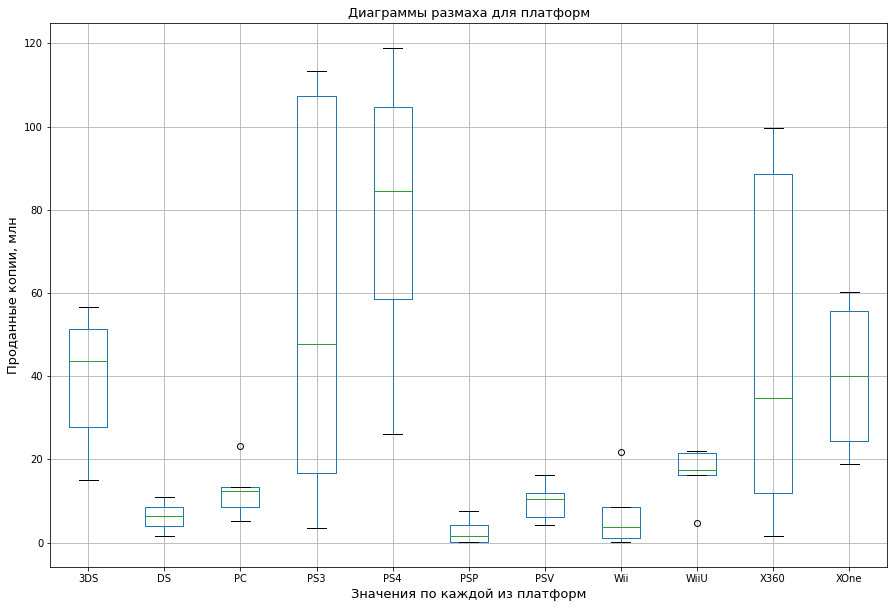

In [43]:
# Построение диаграмм размаха на одном графике:
recent_sales_stat.boxplot(figsize=(15, 10))

# Настройка графика:
plt.title('Диаграммы размаха для платформ',
         fontsize=13)
plt.xlabel('Значения по каждой из платформ',
          fontsize=13)
plt.ylabel('Проданные копии, млн', fontsize=13)

plt.show()

1. Столбец `3DS`: Значений-выбросов нет. Первый квартиль (Q1) на уровне **28млн** копий, третий (Q3) — **52млн** копий. На уровне 43-44млн копий располагается медианное значение продаж.


2. Стоблец `DS`: Значений-выбросов тоже нет, да и сами значения уже меньше, чем у предыдущей платформы. Первый квартиль (Q1) почти на уровне **4млн** копий, третий (Q3) — почти на **9.5млн** копий. Медиана примерно на 6.2млн копий.


3. Столбец `PC`: Здесь ситуация уже поинтереснее. Имеется 1 значение-выброс на уровне **~ 23млн** копий. Медианное значение почти на 12.5млн. Первый квартиль на уровне **~ 8млн**, а третий (Q3) совпадает с границей диапазона, в котором значение не считается выбросом — примерно **13млн** копий.


4. Столбцы `PS3` и `PS4`: Значений-выбросов нет. У PS3 диапазон значений шире, т.к. она дольше присутствует на рынке. Медианное значение больше у `PS4` — **84млн** против **47млн** у `PS3`


6. Столбцы `PSP`и `PSV`: Значений-выбросов у платформы PSP также нет. Достаточно ограниченные диапазоны значений каждых платформ, медиана для `PSP` на уровне **1.7млн**, а у `PSV` — **10.5млн**. Существенная разница.


7. Столбцы `Wii`и `WiiU`: Ситуация интересная. Присутствует по 1 значению-выбросу на каждой из платформ. У `Wii` аномально большой выброс, у `WiiU` наоборот в меньшую сторону. У `Wii` выбросом считается значение в ~ 22млн, а у `WiiU` почти в 5млн. Медиана `Wii` — 3.75млн, у `WiiU` — ~ 17млн.


8. Столбцы `X360`и `XOne`: Выбросов не наблюдается. `X360` значительно дольше на рынке и диапазон его значений намного шире. Медианы при этом не так далеки друг от друга: если у `X360` это примерно **35млн**, то у `XOne` это почти **40млн**.


_Таким образом, было найдено 3 значения-выброса у трёх платформ._

### Корреляция отзывов и продаж

Теперь посмотрим, как влияют на продажи отзывы пользователей и критиков на примере популярной платформы **PS4**. Начнём с пользователей:

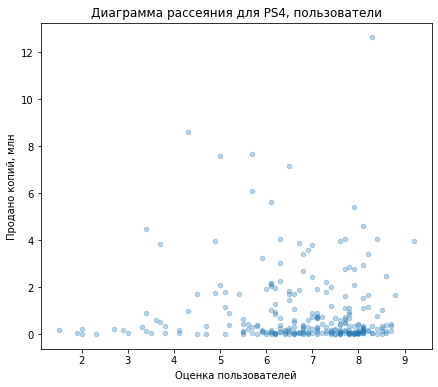

In [44]:
# Построение диаграммы рассеяния:
recent_data[recent_data['platform'] == 'PS4'].plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize=(7, 6),
    alpha=0.3,
    ylabel='Продано копий, млн',
    xlabel='Оценка пользователей'
)
plt.title('Диаграмма рассеяния для PS4, пользователи')

plt.show()

Сложно сказать, как влияют оценки пользователей на продажи игр. В основном игры получают **оценки от 6 до 8.8** и какого-то сильного влияния на продажи это не оказывает. Тем не менее, очень слабая связь прослеживается. Посмотрим теперь на оценки пользователей:

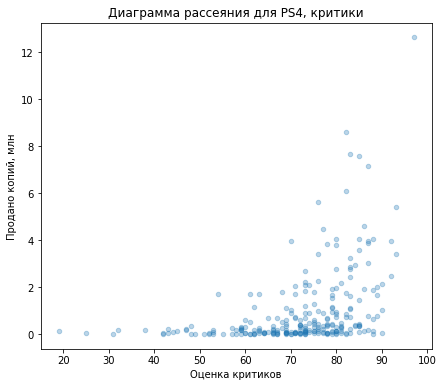

In [45]:
# Построение диаграммы рассеяния:
recent_data[recent_data['platform'] == 'PS4'].plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize=(7, 6),
    alpha=0.3,
    ylabel='Продано копий, млн',
    xlabel='Оценка критиков'
)
plt.title('Диаграмма рассеяния для PS4, критики')

plt.show()

В случае с критиками ситуация прослеживается чуть яснее: чем выше оценка от критиков, тем больше будет шанс на высокие продажи. Обычно игры оцениваются критиками **от 60 до 90 баллов** и уже начиная с **70 баллов** повышенный интерес к игре в виде продаж встречается всё чаще.

Рассчитаем корреляцию между продажами о отзывами обеих групп:

In [46]:
# Считаем корреляции:
print('PS4')
print('Уровень корреляции отзывов геймеров и продаж:',
      recent_data[recent_data['platform'] == 'PS4']\
      .corr().loc['user_score', 'total_sales'].round(2))
print('Уровень корреляции отзывов критиков и продаж:',
      recent_data[recent_data['platform'] == 'PS4']\
      .corr().loc['critic_score', 'total_sales'].round(2))

PS4
Уровень корреляции отзывов геймеров и продаж: -0.03
Уровень корреляции отзывов критиков и продаж: 0.41


Как и было сказано выше по графикам, связь между отзывами критиков и продажами очень слабая, но она есть, в то кремя как связь между отзывами пользователей и продажами почти отсутствует.

Соотнесём полученные выводы с продажами игр на других платформах. К примеру, на `XOne`:

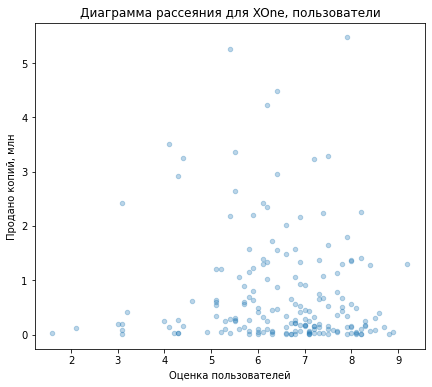

In [47]:
# Построение диаграммы рассеяния:
recent_data[recent_data['platform'] == 'XOne'].plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize=(7, 6),
    alpha=0.3,
    ylabel='Продано копий, млн',
    xlabel='Оценка пользователей'
)
plt.title('Диаграмма рассеяния для XOne, пользователи')

plt.show()

Снова слишком размытая и неявная связь. Посмотрим на критиков:

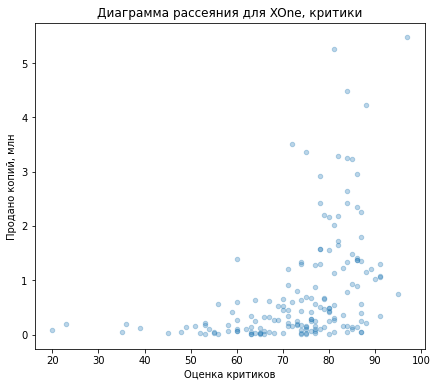

In [48]:
# Построение диаграммы рассеяния:
recent_data[recent_data['platform'] == 'XOne'].plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize=(7, 6),
    alpha=0.3,
    ylabel='Продано копий, млн',
    xlabel='Оценка критиков'
)
plt.title('Диаграмма рассеяния для XOne, критики')

plt.show()

Здесь рост продаж с подъёмом оценок от критиков уже заметен отчётливее. Посчитаем корреляцию снова:

In [49]:
# Считаем корреляции:
print('Xbox One')
print('Уровень корреляции отзывов геймеров и продаж:',
      recent_data[recent_data['platform'] == 'XOne']\
      .corr().loc['user_score', 'total_sales'].round(2))
print('Уровень корреляции отзывов критиков и продаж:',
      recent_data[recent_data['platform'] == 'XOne']\
      .corr().loc['critic_score', 'total_sales'].round(2))

Xbox One
Уровень корреляции отзывов геймеров и продаж: -0.07
Уровень корреляции отзывов критиков и продаж: 0.42


Прошлые выводы подтвердились и в прошлый раз. Даже уровни корреляции почти равны. Посчитаем на примере `Nintendo 3DS`:

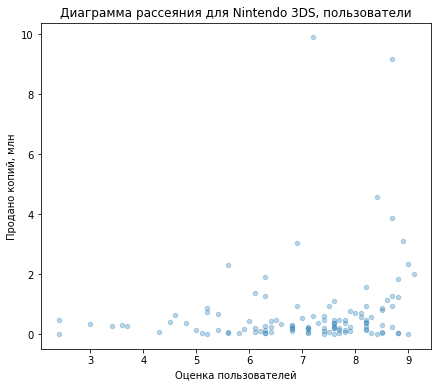

In [50]:
# Построение диаграммы рассеяния:
recent_data[recent_data['platform'] == '3DS'].plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize=(7, 6),
    alpha=0.3,
    ylabel='Продано копий, млн',
    xlabel='Оценка пользователей'
)
plt.title('Диаграмма рассеяния для Nintendo 3DS, пользователи')

plt.show()

Очень неотчётливо, попробуем критиков:

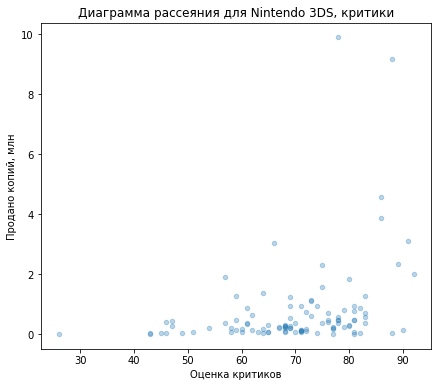

In [51]:
# Построение диаграммы рассеяния:
recent_data[recent_data['platform'] == '3DS'].plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize=(7, 6),
    alpha=0.3,
    ylabel='Продано копий, млн',
    xlabel='Оценка критиков'
)
plt.title('Диаграмма рассеяния для Nintendo 3DS, критики')

plt.show()

Все ещё очень не отчётливо, но зачатки есть. Посмотрим на числовую корреляцию:

In [52]:
# Считаем корреляции:
print('Nintendo 3DS')
print('Уровень корреляции отзывов геймеров и продаж:',
      recent_data[recent_data['platform'] == '3DS']\
      .corr().loc['user_score', 'total_sales'].round(2))
print('Уровень корреляции отзывов критиков и продаж:',
      recent_data[recent_data['platform'] == '3DS']\
      .corr().loc['critic_score', 'total_sales'].round(2))

Nintendo 3DS
Уровень корреляции отзывов геймеров и продаж: 0.2
Уровень корреляции отзывов критиков и продаж: 0.32


С этой платформой ситуация чуть-чуть другая: связи обе слабые, но всё же у критиков чуть сильнее.

### Жанры

Посмотрим на общее распределение игр по жанрам.

In [53]:
# Выведем кол-во релизов в каждом жанре:
recent_data['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

Бесспорным лидером по кол-ву выпущенных игр является жанр `Action`. Он настолько сильно выбивается из всех жанров, что второе место даже бессмысленно выделять. В аутсайдерах находится жанр `Puzzle`.

Посмотрим, как распределяются продажи по жанрам.

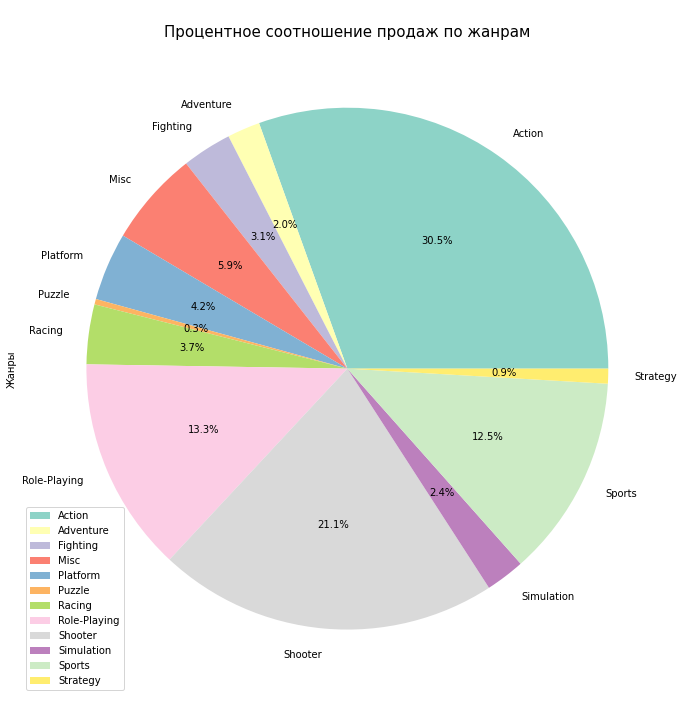

In [54]:
# Сгруппируем по жанрам в сводной таблице:
genre_grouped = recent_data.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='sum'
)

# Построение диаграммы распр.-я продаж:
genre_grouped.plot(
    kind='pie',
    y='total_sales',
    figsize=(12, 12),
    autopct='%1.1f%%',
    ylabel='Жанры',
    colors=plt.cm.Set3.colors
)
plt.title('\nПроцентное соотношение продаж по жанрам',
         fontsize=15)
plt.legend(loc=3)

plt.show()

Из данной диаграммы видно, что по сути самым `прибыльным` жанром является **Shooter**. Их вышло всего 235шт, а доля их продаж составляет **21.1%**, что всего на **9.4%** меньше, чем у **Action**. Action «задавил» количеством релизов, то есть экшн-жанр не является таким уж прибыльным, как кажется на первый взгляд.

Самым `низкоприбыльным` жанром является **Adventure**: доля его продаж составляет всего **2%**, когда по кол-ву релизов он находится на **3-м** месте (302шт).

Посмотрим, на какие платформы выпускаются выделенные жанры:

In [55]:
# Выведем кол-во action-игр по платформам:
recent_data[recent_data['genre'] == 'Action']\
['platform'].value_counts()

PS3     170
3DS     156
PSV     145
PS4     144
X360    102
XOne     85
PC       66
WiiU     64
PSP      63
Wii      21
DS       15
Name: platform, dtype: int64

Игры в жанре `Action` выпускались больше всего на платформы **PS3**, **PS4**, **Nintendo 3DS**. Посмотрим на шутеры:

In [56]:
# Выведем кол-во shooter-игр по платформам:
recent_data[recent_data['genre'] == 'Shooter']\
['platform'].value_counts()

PS3     50
X360    49
PS4     41
PC      41
XOne    38
WiiU    10
PSV      4
3DS      2
Name: platform, dtype: int64

Таким образом, `Shooter`ы выпускались в основном для **PS3**, **PS4**, **Xbox360** и **PC**. Посмотрим на аутсайдера `Puzzle`:

In [57]:
# Выведем кол-во puzzle-игр по платформам:
recent_data[recent_data['genre'] == 'Puzzle']\
['platform'].value_counts()

3DS     13
DS       4
WiiU     4
PSV      2
PC       2
PS4      1
PS3      1
Wii      1
Name: platform, dtype: int64

Можно сказать, игры в жанре `Puzzle` выпускались в основном для платформы **Nintendo 3DS**.

Рассмотрим оценки от критиков и пользователей для каждого жанра с помощью диаграмм размаха:

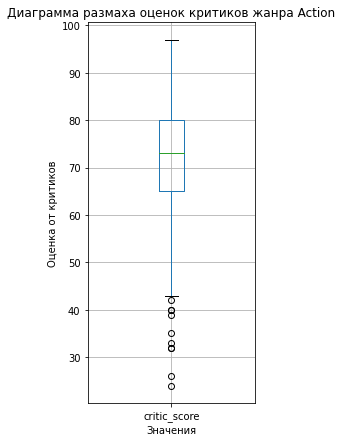

In [58]:
# Построение диаграммы размаха: 
recent_data[recent_data['genre'] == 'Action'].boxplot(
    column='critic_score',
    figsize=(3, 7)
)
plt.xlabel('Значения')
plt.ylabel('Оценка от критиков')
plt.title('Диаграмма размаха оценок критиков жанра Action')

plt.show()

Судя по диаграмме размаха, медианная оценка критиков для `экшн-игр` составляет **73** балла, нормальный диапазон начинается от 43 до 97 баллов. Также имеются значения-выбросы с самыми низкими оценками от **24 до 42** баллов. Посмотрим ситуацию по оценке пользователей:

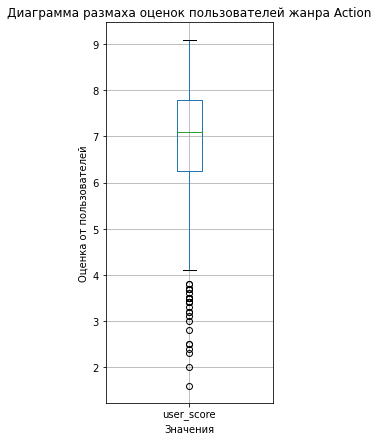

In [59]:
# Построение диаграммы размаха: 
recent_data[recent_data['genre'] == 'Action'].boxplot(
    column='user_score',
    figsize=(3, 7)
)
plt.xlabel('Значения')
plt.ylabel('Оценка от пользователей')
plt.title('Диаграмма размаха оценок пользователей жанра Action')

plt.show()

Пользователи, кажется, немного строже оценивают игры. Значений-выбросов намного больше и ниже пороговой границы в **4.1** балла есть даже оценки в 2 и в 1.5 балла. Медианная оценка составляет **7.1** балла. Рассмотрим шутерный жанр:

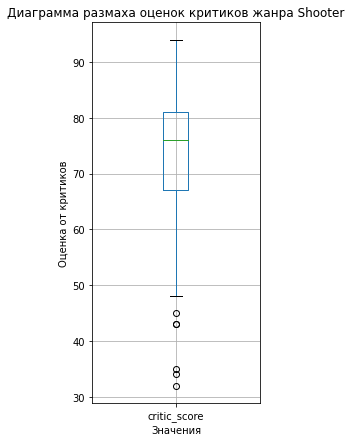

In [60]:
# Построение диаграммы размаха: 
recent_data[recent_data['genre'] == 'Shooter'].boxplot(
    column='critic_score',
    figsize=(3, 7)
)
plt.xlabel('Значения')
plt.ylabel('Оценка от критиков')
plt.title('Диаграмма размаха оценок критиков жанра Shooter')

plt.show()

Шутеры получали немного меньше низких оценов критиков, не встречаются оценки ниже 32 баллов, в отличие от экшенов. Медианная оценка от критиков составляет **76 баллов**, что выше, чем у экшен-жанра. Не столь удивительно, ведь как было выяснено выше, присутствует корреляция между отзывами критиков и продажами. Посмотрим на оценки пользователей:

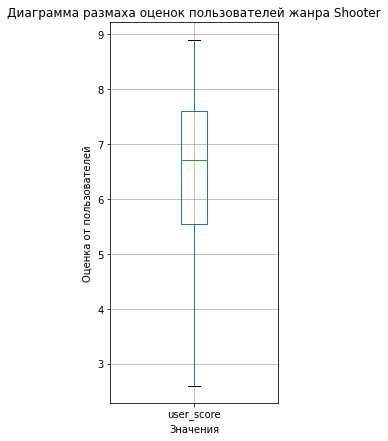

In [61]:
# Построение диаграммы размаха: 
recent_data[recent_data['genre'] == 'Shooter'].boxplot(
    column='user_score',
    figsize=(3, 7)
)
plt.xlabel('Значения')
plt.ylabel('Оценка от пользователей')
plt.title('Диаграмма размаха оценок пользователей жанра Shooter')

plt.show()

Пользователи снова `строже` оценивают игры-шутеры. Медианная оценка составляет **6.7 балла**, а диапазон нормальных оценок снижен аж до **2.6 баллов**. Выше 9 баллов также ни одна игра не получила, чего не скажешь об оценках критиков. Посмотрим на жанр паззл:

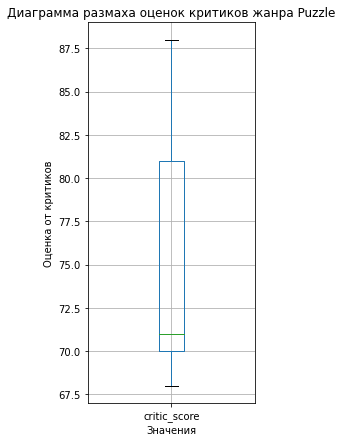

In [62]:
# Построение диаграммы размаха: 
recent_data[recent_data['genre'] == 'Puzzle'].boxplot(
    column='critic_score',
    figsize=(3, 7)
)
plt.xlabel('Значения')
plt.ylabel('Оценка от критиков')
plt.title('Диаграмма размаха оценок критиков жанра Puzzle')

plt.show()

Критики не так строго оценивают паззл-игры. Ни одна игра не получала оценку ниже **68 баллов**. Максимальная даже **88 баллов** Медианная оценка на уровне 71 балла. Посмотрим на оценки пользователей:

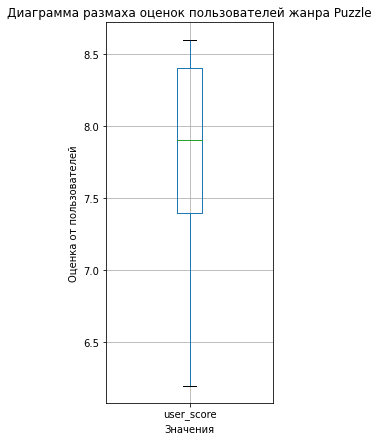

In [63]:
# Построение диаграммы размаха: 
recent_data[recent_data['genre'] == 'Puzzle'].boxplot(
    column='user_score',
    figsize=(3, 7)
)
plt.xlabel('Значения')
plt.ylabel('Оценка от пользователей')
plt.title('Диаграмма размаха оценок пользователей жанра Puzzle')

plt.show()

Пользователи так же не слишком строгие с оцениванием паззл-игр. Хоть диапазон нормальных значений ниже (минимальная оценка в **6.2 балла**), но медиана выше, чем у критиков — **7.9 балла**. _Низкоприбыльность этого жанра обуcловлена малым количеством релизов._

### Вывод

На данном этапе был проведён исследовательский анализ данных. Вот, что было выявлено:

   - Пик выпуска игр пришёлся на период с 2007 по 2011г. Однако в последние 2 года произошёл подъём по выпущенным играм.
   - В актуальный период в лидерах находятся эти платформы: `PS4, Xbox One и Nintendo 3DS`.
   - Построили диаграммы размаха, выбросов было мало и все эти данные понадобятся при дальнейшей работе;
   - Лидером по кол-ву выпущенных игр является жанр `Action`. На последнем месте `Puzzle`.

## Портрет пользователя каждого региона

В нашем датафрейме представлено три региона: North America (Сев. Америка), Europe (Европа) и Japan (япония).
Построим портрет пользователя для каждого региона, чтобы лучше понять целевую аудиторию.

### Платформы

Определим топ-5 платформ для пользователя каждого региона. Начнём с Северной Америки. Популярность будем определять продажами:

In [64]:
# Сгруппируем по платформам и суммируем продажи:
recent_data.groupby('platform')['na_sales'].sum()\
.sort_values(ascending=False).head() # Вывод топ-5

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

В лидерах по продажам для Северной Америки находятся **Xbox360**, **PS4**, **PS3**, **Xbox One** и **3DS**. Визуализируем продажи по платформам:

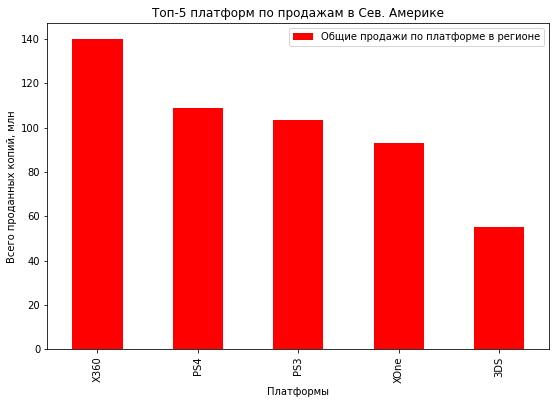

In [65]:
# Создание сводной таблицы по платформам:
na_sales_by_plat = recent_data.pivot_table(
    index='platform',
    values='na_sales',
    aggfunc='sum'
).sort_values(
    by='na_sales',
    ascending=False
)

# Построение столбчатой диаграммы:
na_sales_by_plat.head().plot(
    kind='bar',
    y='na_sales',
    figsize=(9, 6),
    xlabel='Платформы',
    ylabel='Всего проданных копий, млн',
    color='r'
)
plt.title('Топ-5 платформ по продажам в Сев. Америке')
plt.legend(['Общие продажи по платформе в регионе'])

plt.show()

Визуализируем процентное соотношение продаж:

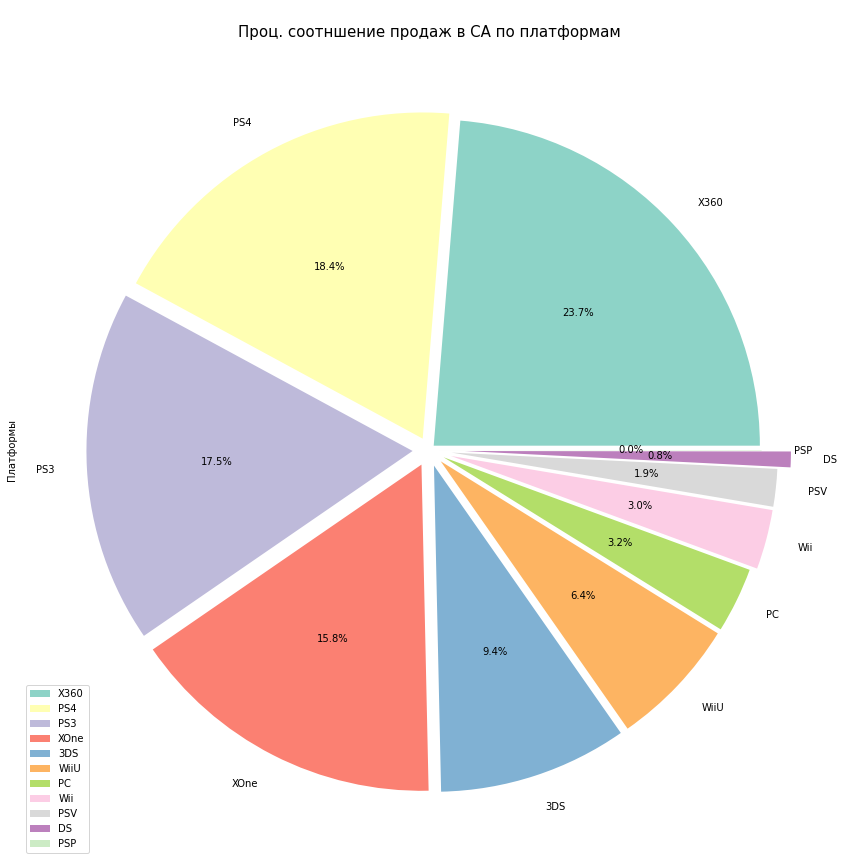

In [66]:
# Построение круговой диаграммы

# Запишем отступы секторов, чтобы передать далее в параметр:
explode = [.02, .04, .05, .05, .05, .05,
           .05, .07, .07, .11, .02]

na_sales_by_plat.plot(
    kind='pie',
    y='na_sales',
    figsize=(15, 15),
    autopct='%1.1f%%',
    ylabel='Платформы',
    colors=plt.cm.Set3.colors,
    explode=explode
)
plt.title('\nПроц. соотншение продаж в СА по платформам',
         fontsize=15)
plt.legend(loc=3)
plt.xticks(fontsize=17)

plt.show()

Таким образом, платформа **Xbox 360** занимает **23.7%** всех продаж в `Северной Америке`. Также в лидерах:
   - `PS4` (18.4%)
   - `PS3` (17.5%)
   - `Xbox One` (15.8%)
   - `3DS` (9.4%)
   
Посмотрим на платформы в Европе:

In [67]:
# Сгруппируем по платформам и суммируем продажи:
recent_data.groupby('platform')['eu_sales'].sum()\
.sort_values(ascending=False).head() # Вывод топ-5

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

В Европе уже вовсю лидирует PS4. Визуализируем соотношение и процентное соотношение:

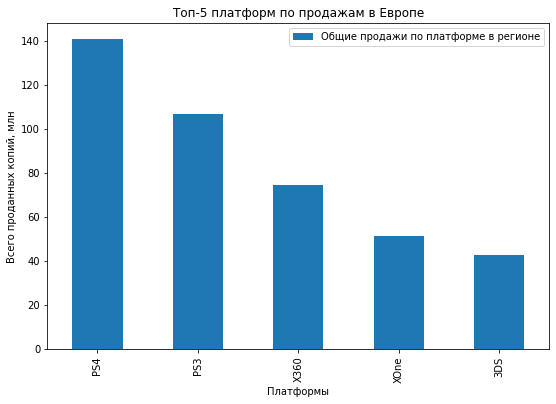

In [68]:
# Создание сводной таблицы по платформам:
eu_sales_by_plat = recent_data.pivot_table(
    index='platform',
    values='eu_sales',
    aggfunc='sum'
).sort_values(
    by='eu_sales',
    ascending=False
)

# Построение столбчатой диаграммы:
eu_sales_by_plat.head().plot(
    kind='bar',
    y='eu_sales',
    figsize=(9, 6),
    xlabel='Платформы',
    ylabel='Всего проданных копий, млн'
)
plt.title('Топ-5 платформ по продажам в Европе')
plt.legend(['Общие продажи по платформе в регионе'])

plt.show()

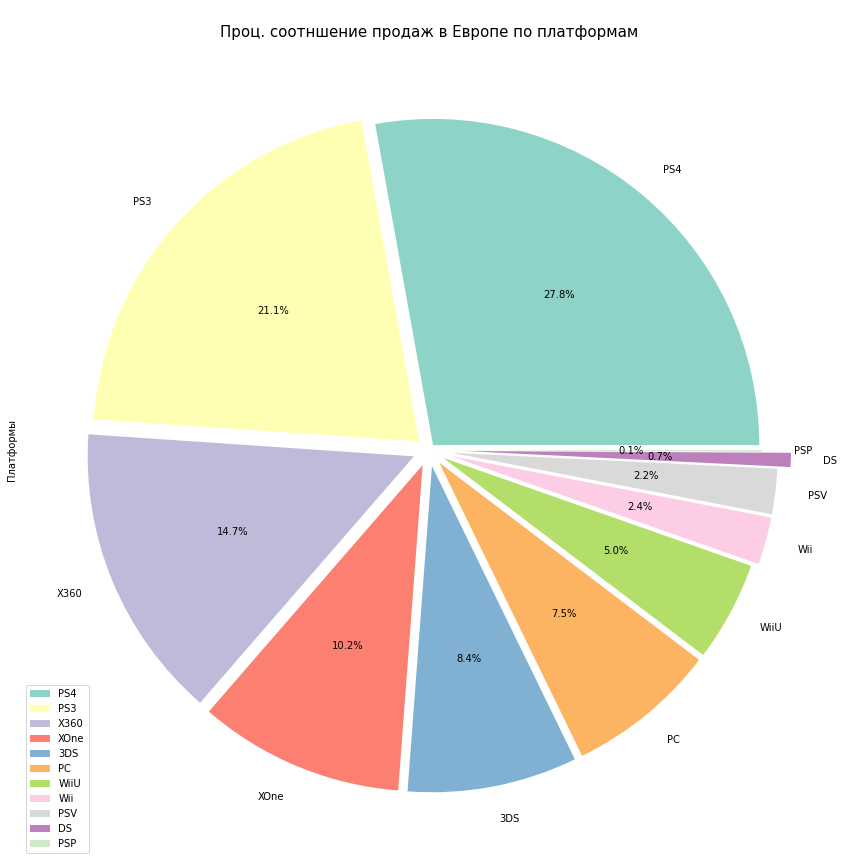

In [69]:
# Построение круговой диаграммы

# Запишем отступы секторов, чтобы передать далее в параметр:
explode = [.02, .04, .05, .05, .05, .05,
           .05, .07, .07, .11, .02]

eu_sales_by_plat.plot(
    kind='pie',
    y='eu_sales',
    figsize=(15, 15),
    autopct='%1.1f%%',
    ylabel='Платформы',
    colors=plt.cm.Set3.colors,
    explode=explode
)
plt.title('\nПроц. соотншение продаж в Европе по платформам',
         fontsize=15)
plt.legend(loc=3)

plt.show()

Таким образом, в `Европе` ситуация иная. Вот топ-5 платформ по продажам:
   
   - `PS4` (27.8% от общих продаж и далее)
   - `PS3` (21.1%)
   - `Xbox 360` (14.7%)
   - `Xbox One` (10.2%)
   - `3DS` (8.4%)
   
Рассмотрим платформы в Японии:

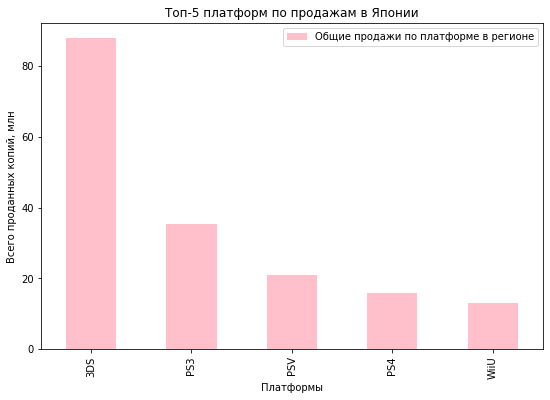

In [70]:
# Создание сводной таблицы по платформам:
jp_sales_by_plat = recent_data.pivot_table(
    index='platform',
    values='jp_sales',
    aggfunc='sum'
).sort_values(
    by='jp_sales',
    ascending=False
)

# Построение столбчатой диаграммы:
jp_sales_by_plat.head().plot(
    kind='bar',
    y='jp_sales',
    figsize=(9, 6),
    xlabel='Платформы',
    ylabel='Всего проданных копий, млн',
    color='pink'
)
plt.title('Топ-5 платформ по продажам в Японии')
plt.legend(['Общие продажи по платформе в регионе'])

plt.show()

,jp_sales
platform,
PC,0.0


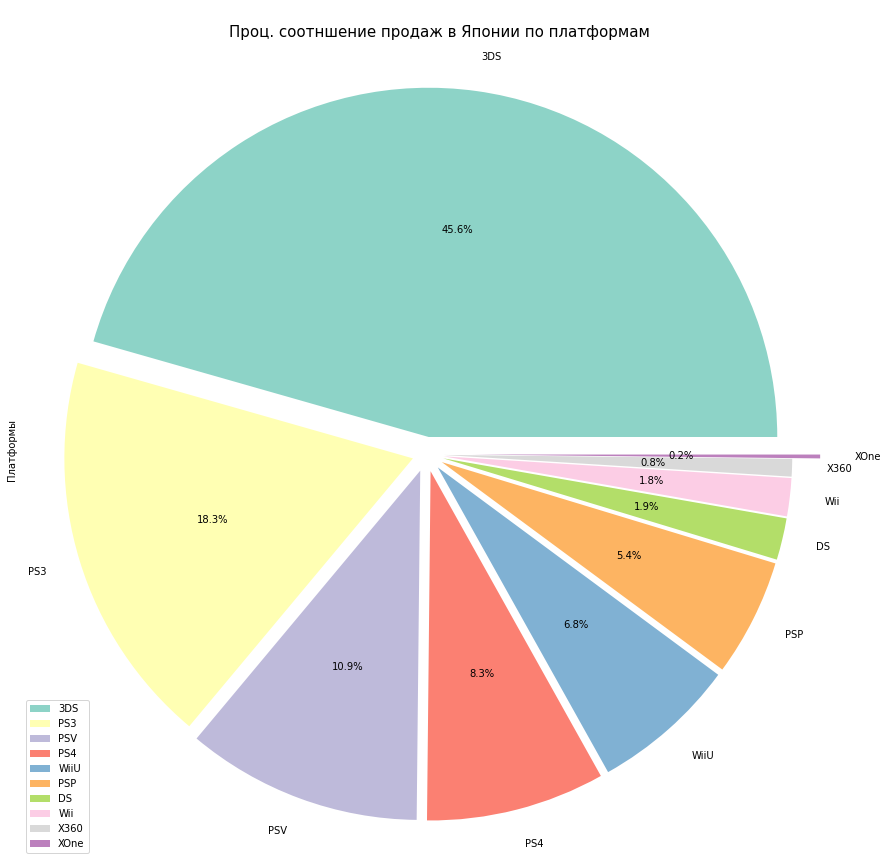

In [86]:
# Построение круговой диаграммы

# Запишем отступы секторов, чтобы передать в параметр:
explode = [.05, .04, .05, .05, .05, .05,
           .05, .05, .05, .13]

# Выводим продажи PC как приложение:
display(jp_sales_by_plat.tail(1))

# PC убироаем, т.к. его доля нулевая
# Отстраиваем и выводим график:
jp_sales_by_plat.query('index != "PC"').plot(
    kind='pie',
    y='jp_sales',
    figsize=(15, 15),
    autopct='%1.1f%%',
    ylabel='Платформы',
    colors=plt.cm.Set3.colors,
    explode=explode,
)
plt.title('\nПроц. соотншение продаж в Японии по платформам',
         fontsize=15)
plt.legend(loc=3)
plt.axis('equal')

plt.show()

Кардинально ситуация отличается в `Японии`. Топ-5 платформ по продажам:
   
   - `Nintendo 3DS`, абсолютный лидер (**45.6%** от общих продаж и далее)
   - `PS3` (18.3%)
   - `PSV` (10.9%)
   - `PS4` (8.3%)
   - `WiiU` (6.8%)
   
### Жанры

Выявим топ-5 популярных жанров в каждом регионе. Начнём с **Северной Америки**.

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


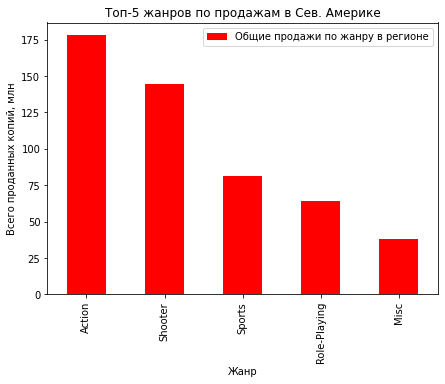

In [72]:
# Создание сводной таблицы по жанрам:
na_sales_by_genre = recent_data.pivot_table(
    index='genre',
    values='na_sales',
    aggfunc='sum'
).sort_values(
    by='na_sales',
    ascending=False
)

display(na_sales_by_genre.head())

# Построение столбчатой диаграммы:
na_sales_by_genre.head().plot(
    kind='bar',
    y='na_sales',
    figsize=(7, 5),
    xlabel='Жанр',
    ylabel='Всего проданных копий, млн',
    color='r'
)
plt.title('Топ-5 жанров по продажам в Сев. Америке')
plt.legend(['Общие продажи по жанру в регионе'])

plt.show()

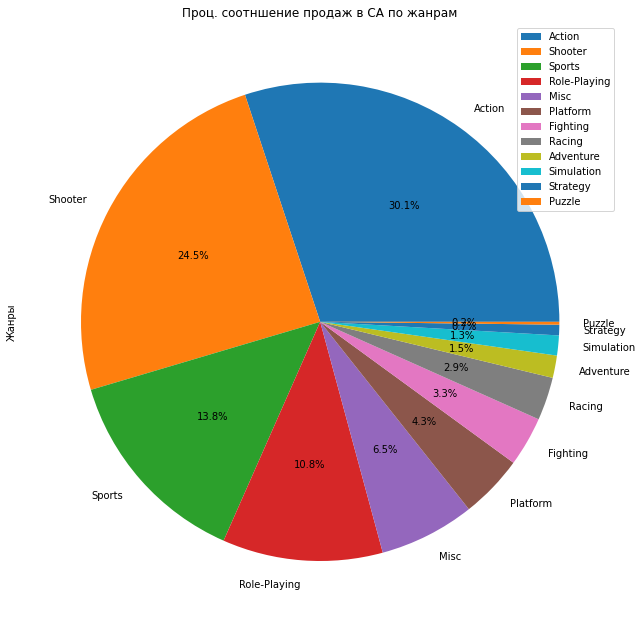

In [73]:
# Построение круговой диаграммы:
na_sales_by_genre.plot(
    kind='pie',
    y='na_sales',
    figsize=(11, 11),
    autopct='%1.1f%%',
    ylabel='Жанры'
)
plt.title('Проц. соотншение продаж в СА по жанрам')
plt.legend(loc=1)

plt.show()

Таким образом, в **Северной Америке** наиболее популярные жанры следующие:
   
   - `Action` (30.1% от общих продаж и далее)
   - `Shooter` (24.5%)
   - `Sports` (13.8%)
   - `Role-Playing` (10.8%)
   - `Misc` (6.5%)
   
Далее рассмотрим Европу:

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


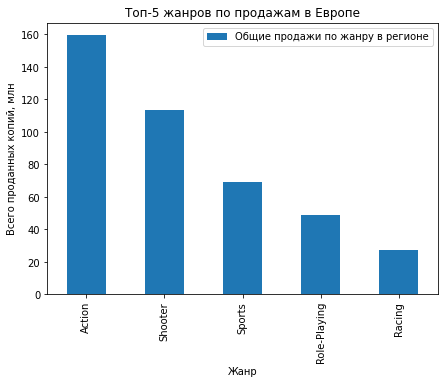

In [74]:
# Создание сводной таблицы по жанрам:
eu_sales_by_genre = recent_data.pivot_table(
    index='genre',
    values='eu_sales',
    aggfunc='sum'
).sort_values(
    by='eu_sales',
    ascending=False
)

display(eu_sales_by_genre.head())

# Построение столбчатой диаграммы:
eu_sales_by_genre.head().plot(
    kind='bar',
    y='eu_sales',
    figsize=(7, 5),
    xlabel='Жанр',
    ylabel='Всего проданных копий, млн'
)
plt.title('Топ-5 жанров по продажам в Европе')
plt.legend(['Общие продажи по жанру в регионе'])

plt.show()

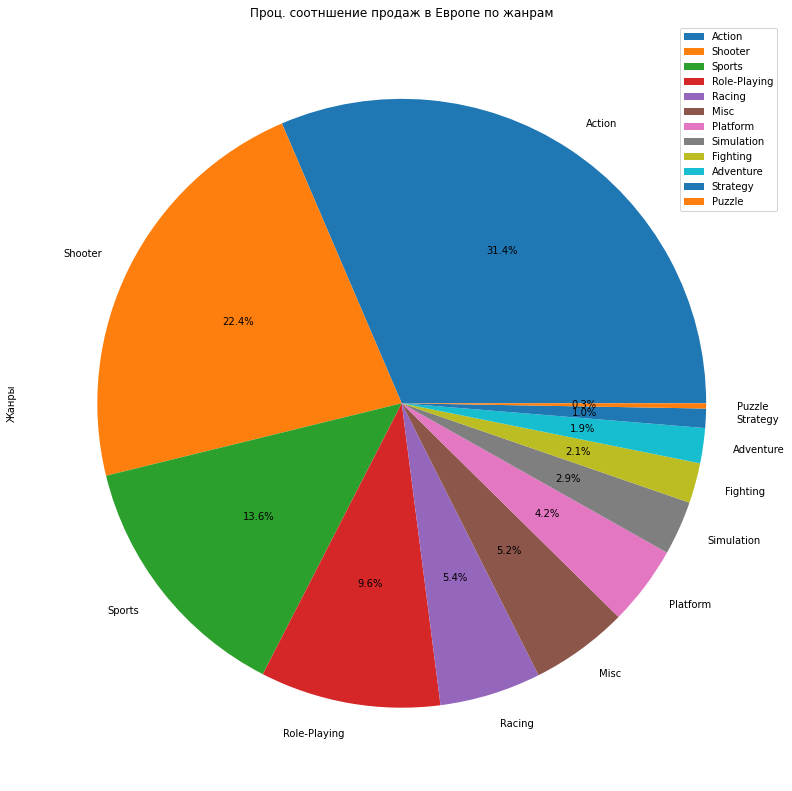

In [75]:
# Построение круговой диаграммы:
eu_sales_by_genre.plot(
    kind='pie',
    y='eu_sales',
    figsize=(14, 14),
    autopct='%1.1f%%',
    ylabel='Жанры'
)
plt.title('Проц. соотншение продаж в Европе по жанрам')
plt.legend(loc=1)

plt.show()

Почти не отличаются топ-жанры и в **Европе**:

   - `Action` (31.4% от общих продаж и далее)
   - `Shooter` (22.4%)
   - `Sports` (13.6%)
   - `Role-Playing` (9.6%)
   - `Racing` (5.4%)

Жанр гонок в Европе опередил смешанный жанр Misc. Перейдем к Японии:

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


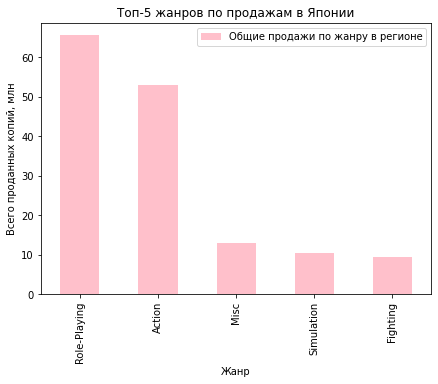

In [76]:
# Создание сводной таблицы по жанрам:
jp_sales_by_genre = recent_data.pivot_table(
    index='genre',
    values='jp_sales',
    aggfunc='sum'
).sort_values(
    by='jp_sales',
    ascending=False
)

display(jp_sales_by_genre.head())

# Построение столбчатой диаграммы:
jp_sales_by_genre.head().plot(
    kind='bar',
    y='jp_sales',
    figsize=(7, 5),
    xlabel='Жанр',
    ylabel='Всего проданных копий, млн',
    color='pink'
)
plt.title('Топ-5 жанров по продажам в Японии')
plt.legend(['Общие продажи по жанру в регионе'])

plt.show()

И снова картина _переворачивается_ в Японии. Посмотрим процентное соотношение:

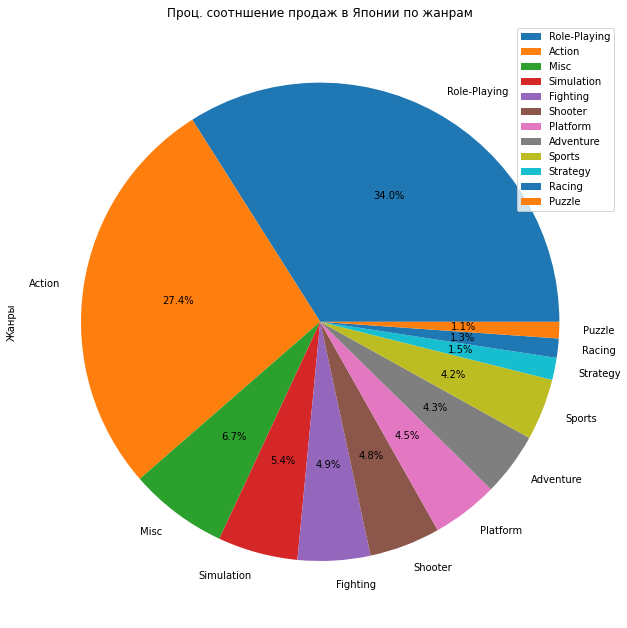

In [77]:
# Построение круговой диаграммы:
jp_sales_by_genre.plot(
    kind='pie',
    y='jp_sales',
    figsize=(11, 11),
    autopct='%1.1f%%',
    ylabel='Жанры'
)
plt.title('Проц. соотншение продаж в Японии по жанрам')
plt.legend(loc=1)

plt.show()

Мы получили совсем другие популярные жанры в **Японии**:

   - `Role-Playing` (**34%** от общих продаж и далее)
   - `Action` (**27.4%**)
   - `Misc` (6.7%)
   - `Simulation` (5.4%)
   - `Fighting` (4.9%)

Ролевые игры и экшены _наиболее_ выделяются по доле продаж среди всех жанров.

### Влияние рейтинга ESRB на продажи

Оценим, как влияет рейтинг на продажи в **Северной Америке**. Сначала отфильтруем датафрейм, убрав из него значение `unknown` в столбце **rating**, т.к. в этом случае оно бесполезно.

In [78]:
# Делаем срез данных и сохраняем отдельно:
recent_data_rating = \
recent_data.query('rating != "unknown"')\
.reset_index(drop=True)

# Проверка:
display(recent_data_rating.head())
print('Кол-во строк:', recent_data_rating.shape[0])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


Кол-во строк: 1611


Отфильтруем полученный срез данных по нужному _региону_ и визуализируем продажи в линейном графике:

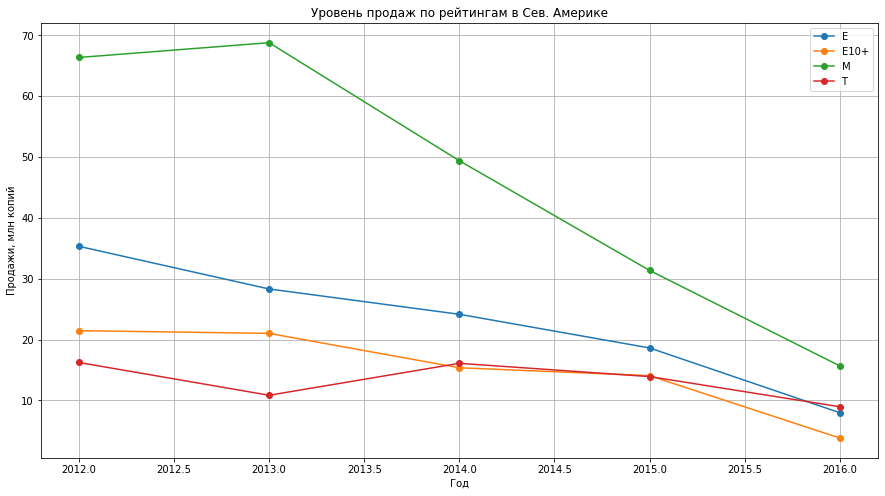

In [79]:
# Создаём сводную таблицу по рейтингам и регионам:
genre_sales_stat = \
    recent_data_rating.pivot_table(
    index='year_of_release',
    columns='rating',
    values=['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc='sum'
)

# Построение графика:
genre_sales_stat['na_sales'].plot(
    style='o-',
    figsize=(15, 8),
    grid=True,
    xlabel='Год',
    ylabel='Продажи, млн копий'
)
plt.title('Уровень продаж по рейтингам в Сев. Америке')
plt.legend()

plt.show()

Игры с рейтингом `«M» («Mature») — «Для взрослых»` с каждым годом, начиная с 2013, _уверенно и стремительно падают_ по продажам в **Северной Америке**, однако они всё еще остаются самыми прибыльными. До 2016г самым прибыльным оставался рейтинг `«E» («Everyone») — «Для всех»`, но он уступил рейтингу `«T» («Teen») — «Подросткам»`. 

Переходим к **Европе**:

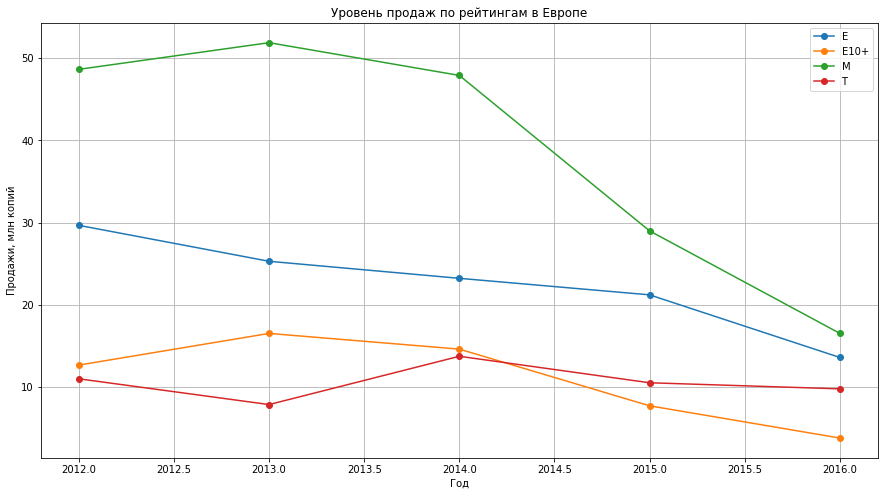

In [80]:
# Построение графика:
genre_sales_stat['eu_sales'].plot(
    style='o-',
    figsize=(15, 8),
    grid=True,
    xlabel='Год',
    ylabel='Продажи, млн копий'
)
plt.title('Уровень продаж по рейтингам в Европе')
plt.legend()

plt.show()

В **Европе** менее стремительно падают по продажам игры с рейтингом `М`, на втором месте по прибыльности игры рейтинга `Е`. Игры рейтинга `T` держатся по продажам относительно стабильно последние 3 года.

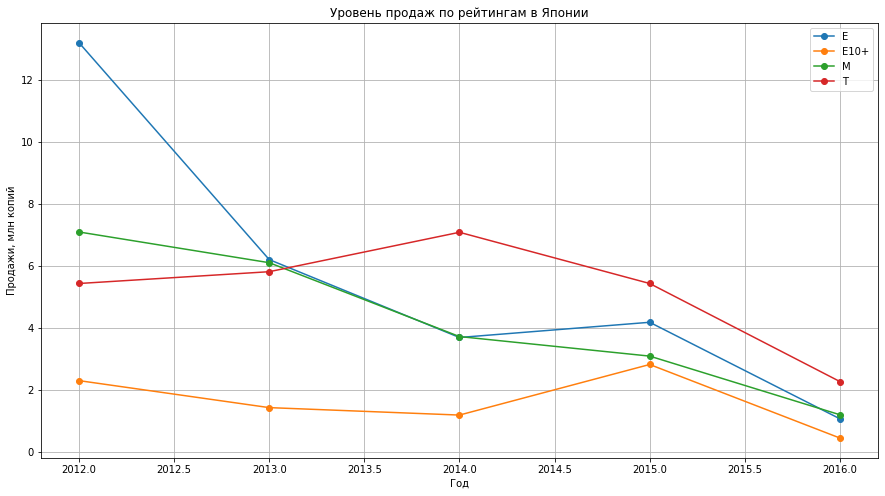

In [81]:
# Построение графика:
genre_sales_stat['jp_sales'].plot(
    style='o-',
    figsize=(15, 8),
    grid=True,
    xlabel='Год',
    ylabel='Продажи, млн копий'
)
plt.title('Уровень продаж по рейтингам в Японии')
plt.legend()

plt.show()

В **Японии** всё немного по-другому: самую большую прибыль в ней приносят игры с рейтингом `T`. Рейтинги `Е` и `М` шли относительно одинаково, но после 2014г у `Е` выросли продажи в то время как у `M` они продолжили медленно снижаться. Рейтинг `E10+` также показал неплохой рост в 2015г. Однако все равно в последний год просели все категории.

### Вывод

На данном этапе мы составили примерные портреты пользователей для каждого из регионов: Северная Америка, Европа и Япония.

Вот, что было выявлено:


   - `Cеверная Америка`:
       
     
      - эти платформы пользуются особой популярностью: Xbox360, PS4, PS3 и Xbox One;
      - наиболее популярные жанры: Action, Shooter, Sports и Role-Playing;
      - все жанры снилизились по прибыли в последние годы, но наиболее прибыльным всё же остаётся M, за ним идёт Е;
   
   
   - `Европа`:
      
      
      - не отличаются от Америки сами популярные платформы, в лидерах всё те же: PS4, PS3, Xbox 360 и Xbox One;
      - не отличаются и наиболее популярные жанры: Action, Shooter, Sports и Role-Playing;
      - очень похожаяя картина и по жанрам: просели все в той или иной степени, самый прибыльный всё еще М, 
        на втором месте Е.
      
   - `Япония`:
     
     
       - абсолютным фаворитом является платформа Nintendo 3DS, далее PS3 и PSV;
       - на первые места выходят жанры Role-Playing и Action;
       - игры для подростков (Т) прибыльнее всего идут в Японии;

## Проверка гипотез

### Гипотеза 1

Необходимо проверить гипотезу: Средние пользовательские рейтинги платформ `Xbox One` и `PC` _одинаковые._ 
Cформулируем нулевую и альтернативную гипотезы:

**H₀** (нулевая гипотеза): средний польз. рейтинг Xbox One **равен** среднему польз. рейтингу PC;

**H₁** (альт. гипотеза, _двусторонняя_): средний польз. рейтинг Xbox One **не равен** среднему польз. рейтингу PC;

У нас есть две выборки двух генеральных совокупностей (далее ГС) — рейтинги платформ `Xbox One` и `PC`. Для такой ситуации отлично подойдёт **t-тест** (метод `scipy.stats.ttest_ind`). Аргументами метода выступят отобранные выборки согласно _порядку_ в сформулированных гипотезах. Параметру `equal_var` передадим значение `False`, т.к. у нас нет никаких оснований считать, что у этих выборок равные дисперсии. Параметр `alternative` по умолчанию для двусторонней гипотезы. 

_Уровень статистической значимости_ устанавливаю на уровне `5%`.

In [82]:
# Подготавливаем две выборки для проверки:
xone_array = recent_data.query(
    'platform == "XOne" & user_score.notna()')['user_score']
pc_array = recent_data.query(
    'platform == "PC" & user_score.notna()')['user_score']

# Выбранный уровень статист. значимости:
alpha = .05

# Применяем метод:
results = st.ttest_ind(
    xone_array,
    pc_array,
    equal_var=False
)

print(f'p-value = {(results.pvalue * 100).round(2)}%')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value = 54.9%
Не отвергаем нулевую гипотезу


Чтобы удостовериться в непротиворечивости теста, выведем средние оценки для обеих выборок, посчитав их «в лоб».

In [83]:
# Вывод средних значений:
print('Средняя оценка п-лей для Xbox One:',
      xone_array.mean().round(2))
print('Средняя оценка п-лей для PC:',
      pc_array.mean().round(2))

Средняя оценка п-лей для Xbox One: 6.52
Средняя оценка п-лей для PC: 6.43


Средние оценки действительно очень близки.

#### Вывод

Таким образом, при условии, что нулевая гипотеза верна, мы не смогли её _отвергнуть_, так как значение `p-value` — вероятность получить наблюдаемый или ещё более далекий от предполагаемого результат — сильно больше установленного выше уровня статист. значимости. **Есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC будут одинаковыми.**

### Гипотеза 2

Необходимо проверить гипотезу: Средние пользовательские рейтинги жанров `Action` и `Sports` _разные._ Cформулируем нулевую и альтернативную гипотезы:

H₀ (нулевая гипотеза): средний польз. рейтинг жанра `Action` **равен** среднему польз. рейтингу жанра `Sports`;

H₁ (альт. гипотеза, двусторонняя): средний польз. рейтинг жанра `Action` **не равен** среднему польз. рейтингу жанра `Sports`;

*Предположим, что нулевая гипотеза верна* и проведем статистический тест. Здесь подойдёт *тот же* метод, что и в предыдущей гипотезе. В аргументы методу передадим обе выборки по жанрам в строгом порядке согласно сформулированным гипотезам. Значения параметров те же.

_Уровень статистической значимости_ устанавливаю на уровне `5%`. Время провести t-тест:

In [84]:
# Подготавливаем две выборки для проверки:
action_array = recent_data.query(
    'genre == "Action" & user_score.notna()')['user_score']
sports_array = recent_data.query(
    'genre == "Sports" & user_score.notna()')['user_score']

# Выбранный уровень статист. значимости:
alpha = .05

# Применяем метод:
results = st.ttest_ind(
    action_array,
    sports_array,
    equal_var=False
)

print(f'p-value = {results.pvalue}%')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value = 4.24307776572644e-20%
Отвергаем нулевую гипотезу


Вероятность получить наблюдаемый или ещё более далекий от предполагаемого результат оказалась настолько мала, что нам пришлось отвергнуть гипотезу о равенстве средних польз. оценок жанров. Чтобы снова удостовериться в непротиворечивости теста, выведем средние оценки для обеих выборок:

In [85]:
# Вывод средних значений:
print('Средняя оценка п-лей для жанра Action:',
      action_array.mean().round(2))
print('Средняя оценка п-лей для жанра Sports:',
      sports_array.mean().round(2))

Средняя оценка п-лей для жанра Action: 6.83
Средняя оценка п-лей для жанра Sports: 5.46


Как мы видим, даже посчитав их так, они _слишком_ разные.

#### Вывод

Таким образом, _даже_ при условии, что нулевая гипотеза верна, нам пришлолсь её _отвергнуть_, так как значение `p-value` меньше установленного уровня статистической значимости. **Есть все основания полагать, что средние пользовательские рейтинги для жанров `Action` и `Sports` будут разными.**

## Общий вывод

По итогам предобработки данных и исследовательского анализа для текущего _актуального_ периода было выявлено:

1. `2015г` выделяется обилием релизов.


2. Самые популярные платформы: `PS4, Xbox One и Nintendo 3DS`.


3. Чаще всего выходят _экшены, рол-плэи и приключенческие_. Реже всего выходят _стратегии и паззл-игры_.


4. Портреты пользователей `Северной Америки` и `Европы` почти _идентичны_: у обеих групп популярны одинаковые жанры (_экшены, шутеры, рол-плеи_) и одинаковые платформы (_Xbox360, PS4, PS3 и Xbox One_). Даже те же популярные рейтинги (_«для всех» и «для взрослых»_). 
    Чего не скажешь о `Японии`. Популярна там _Nintendo 3DS_, жанры рол-плэй и экшн. Больше всего приносят игры _«для подростков»_.


5. Были проверены 2 гипотезы:
    
    - Гипотеза 1:  есть основания полагать, что _средние пользовательские рейтинги_ платформ `Xbox One` и `PC` **будут одинаковыми**.
    
    - Гипотеза 2:  также есть все основания полагать, что _средние пользовательские рейтинги_ для жанров `Action` и `Sports` **будут разными**.